In [1]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

In [2]:
# Function for reading images
def read_image(img):
    img = cv2.imread(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    return img
    

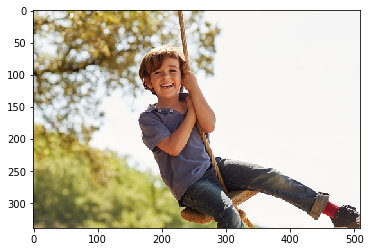

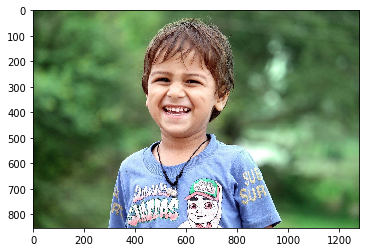

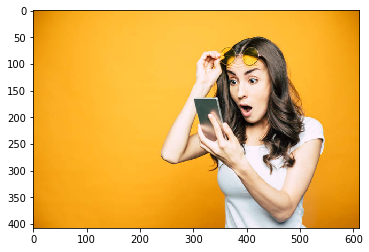

In [3]:
img1 = read_image('happyboy.jpg')
img2 = read_image('happyboy2.jpg')
img3 = read_image('surprise1.jpg')

In [4]:
pred = DeepFace.analyze(img3, actions=['emotion'])
pred

{'emotion': {'angry': 1.695140952051588e-05,
  'disgust': 1.2776426600702152e-14,
  'fear': 0.16916535096243024,
  'happy': 0.0016418749510194175,
  'sad': 8.1608515500875e-07,
  'surprise': 99.82917904853821,
  'neutral': 5.497087229855424e-07},
 'dominant_emotion': 'surprise',
 'region': {'x': 341, 'y': 88, 'w': 105, 'h': 105}}

In [5]:
# Function for detecting faces and drawing bounding box
def detect(img, prediction):
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw bounding box around face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, prediction['dominant_emotion'],
               (0, 50), font, 2,
               (0, 0, 255), 2, cv2.LINE_4)
    
    color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(color_img)
    plt.show()

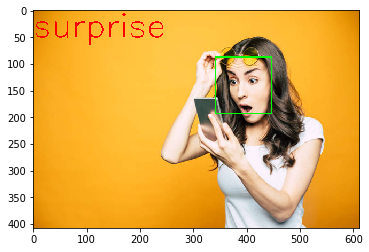

In [6]:
detect(img3, pred)

## For Real Time Facial Emotion Recognition

In [7]:
import cv2
from deepface import DeepFace

In [12]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=['emotion'])
#     result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1,4)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, result['dominant_emotion'],
               (0, 50), font, 2,
               (0, 0, 255), 2, cv2.LINE_4)
    
    cv2.imshow('Demo video', frame)
    
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()